# B. Use the diabetes data set from UCI and Pima Indians Diabetes data set for performing
the following:
a. Univariate analysis: Frequency, Mean, Median, Mode, Variance, Standard
Deviation, Skewness and Kurtosis
b. Bivariate analysis: Linear and logistic regression modeling
c. Multiple Regression analysis
d. Also compare the results of the above analysis for the two data sets
Dataset link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("diabetes.csv")

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# a. Univariate analysis: Frequency, Mean, Median, Mode, Variance, Standard Deviation, Skewness and Kurtosis

In [6]:
#  Frequency for each feature
for column in data.columns:
    print(f"\nFrequency of {column}:\n", data[column].value_counts())



Frequency of Pregnancies:
 Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

Frequency of Glucose:
 Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64

Frequency of BloodPressure:
 BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64

Frequency of SkinThickness:
 SkinThickness

In [7]:
from scipy.stats import skew, kurtosis


Analysis = pd.DataFrame({
    "Mean": data.mean(),
    "Median": data.median(),
    "Mode": data.mode().iloc[0],
    "Variance": data.var(),
    "Standard Deviation": data.std(),
    "Skewness": data.apply(skew),
    "Kurtosis": data.apply(kurtosis)
})
Analysis

,Mean,Median,Mode,Variance,Standard Deviation,Skewness,Kurtosis
Pregnancies,3.845052,3.0000,1.000,11.354056,3.369578,0.899912,0.150383
Glucose,120.894531,117.0000,99.000,1022.248314,31.972618,0.173414,0.628813
BloodPressure,69.105469,72.0000,70.000,374.647271,19.355807,-1.840005,5.138691
SkinThickness,20.536458,23.0000,0.000,254.473245,15.952218,0.109159,-0.524494
Insulin,79.799479,30.5000,0.000,13281.180078,115.244002,2.267810,7.159575
BMI,31.992578,32.0000,32.000,62.159984,7.884160,-0.428143,3.261257
DiabetesPedigreeFunction,0.471876,0.3725,0.254,0.109779,0.331329,1.916159,5.550792
Age,33.240885,29.0000,22.000,138.303046,11.760232,1.127389,0.631177
Outcome,0.348958,0.0000,0.000,0.227483,0.476951,0.633776,-1.598328


# B: Bivariate Analysis

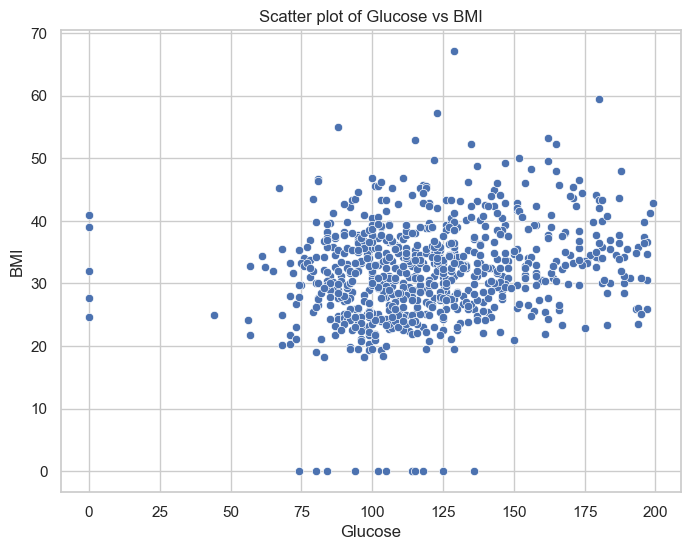

In [8]:
#Scatter plot to visualize relationship between Glucose and BMI
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='BMI', data=data)
plt.title('Scatter plot of Glucose vs BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

In [19]:
#Linear Regression between Glucose and BMI
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score

In [20]:
X_lin = data[['Glucose']]  
y_lin = data['BMI']       

lin_reg = LinearRegression()
lin_reg.fit(X_lin, y_lin)

y_pred_lin = lin_reg.predict(X_lin)
r2 = r2_score(y_lin, y_pred_lin)
print(f"R-squared value for linear regression: {r2}")

R-squared value for linear regression: 0.04887241775173834


In [21]:
# Logistic Regression with all features to predict Outcome

In [22]:
X_log = data.drop('Outcome', axis=1)  
y_log = data['Outcome']               

X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.3, random_state=0)


log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)


y_pred_log = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_log)

print(f"Accuracy of Logistic Regression model: {accuracy}")

Accuracy of Logistic Regression model: 0.7792207792207793


# C: Multiple Regression Analysis

In [23]:
#Multiple Regression analysis to predict BMI using all other features

In [24]:
X_multi = data.drop(['BMI', 'Outcome'], axis=1)  
y_multi = data['BMI']                           

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.3, random_state=0)

multi_reg = LinearRegression()
multi_reg.fit(X_train_multi, y_train_multi)

y_pred_multi = multi_reg.predict(X_test_multi)
mse = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print(f"Mean Squared Error for multiple regression: {mse}")
print(f"R-squared value for multiple regression: {r2_multi}")

Mean Squared Error for multiple regression: 48.943570786772895
R-squared value for multiple regression: 0.12716531950598864


# D: Comparison of Results

In [25]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Logistic Regression", "Multiple Regression"],
    "Metric": ["R-squared", "Accuracy", "R-squared"],
    "Value": [r2, accuracy, r2_multi]
})


In [26]:
results

,Model,Metric,Value
0,Linear Regression,R-squared,0.048872
1,Logistic Regression,Accuracy,0.779221
2,Multiple Regression,R-squared,0.127165
